## <font color='red'> Decision Trees for medical drug prediction </font>

### In this project, the Decision Trees classification algorithm will be used to build a model from the historical data of patients and their response to different medications. After that, the trained decision tree will be used to predict the class of an unknown patient, or to find a proper drug for a new patient.



#### Problem and objective

We are working for a medical researcher compiling data for a study. He has collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. He wants to know the answer to this question: which drug might be appropriate for a future patient with the same illness?

Therefore, the goal of this project to build a machine learning model to find out which drug might be appropriate for a future patient with the same illness. The features of the dataset (data that the researcher collected) are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

With a sample of multiclass classifier, we can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

<b>1. Importing the Libraries:</b>


In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

<b>2. Reading data:</b>

In [2]:
my_data = pd.read_csv("drugs.csv", delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


<b>3. Exploring the dataset:</b>


In [3]:
my_data.shape

(200, 6)

In [4]:
my_data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
my_data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<b>3. Pre-processing:</b>

The following variables were declared: 

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector </b> (target) </li>

</ul>

The column containing the target name was removed since it doesn't contain numeric values.


In [6]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]


array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

Since some features in this dataset are categorical, such as **Sex** or **BP** and Sklearn Decision Trees does not handle categorical variables, was necessary to convert these features to numerical values using **pandas.get_dummies()** to convert the categorical variable into dummy/indicator variables.


In [7]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

Adding the target variable.


In [8]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

<b>4. Splitting data into train and test data:</b>

In [9]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

Verifying if dimensions of X_trainset and y_trainset match

In [10]:
print(X_trainset.shape)
print(y_trainset.shape)

(140, 5)
(140,)


Verifying if dimensions of X_testset and y_testset match

In [11]:
print(X_testset.shape)
print(y_testset.shape)


(60, 5)
(60,)


<b>5. Modeling the Decision Tree:</b>

In [12]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>


In [13]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<b>5. Making predictions on the testing dataset:</b>

In [14]:
predTree = drugTree.predict(X_testset)

Visually comparing the predictions to the actual values

In [15]:
print (predTree [0:10])
print (y_testset [0:10])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX' 'drugC' 'drugY' 'drugA' 'drugB'
 'drugA']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
82     drugC
183    drugY
46     drugA
70     drugB
100    drugA
Name: Drug, dtype: object


<b>6. Evaluating the model:</b>

In [16]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


<b> 7. Visualizing the tree: </b>


[Text(871.875, 978.48, 'Na_to_K <= 14.615\nentropy = 1.929\nsamples = 140\nvalue = [16, 11, 11, 33, 69]\nclass = drugY'),
 Text(697.5, 761.0400000000001, 'BP <= 0.5\nentropy = 1.832\nsamples = 71\nvalue = [16, 11, 11, 33, 0]\nclass = drugX'),
 Text(348.75, 543.6, 'Age <= 50.5\nentropy = 0.975\nsamples = 27\nvalue = [16, 11, 0, 0, 0]\nclass = drugA'),
 Text(174.375, 326.1600000000001, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0, 0, 0, 0]\nclass = drugA'),
 Text(523.125, 326.1600000000001, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0, 0]\nclass = drugB'),
 Text(1046.25, 543.6, 'Cholesterol <= 0.5\nentropy = 0.811\nsamples = 44\nvalue = [0, 0, 11, 33, 0]\nclass = drugX'),
 Text(871.875, 326.1600000000001, 'BP <= 1.5\nentropy = 0.998\nsamples = 21\nvalue = [0, 0, 11, 10, 0]\nclass = drugC'),
 Text(697.5, 108.72000000000003, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]\nclass = drugC'),
 Text(1046.25, 108.72000000000003, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 0, 10, 0

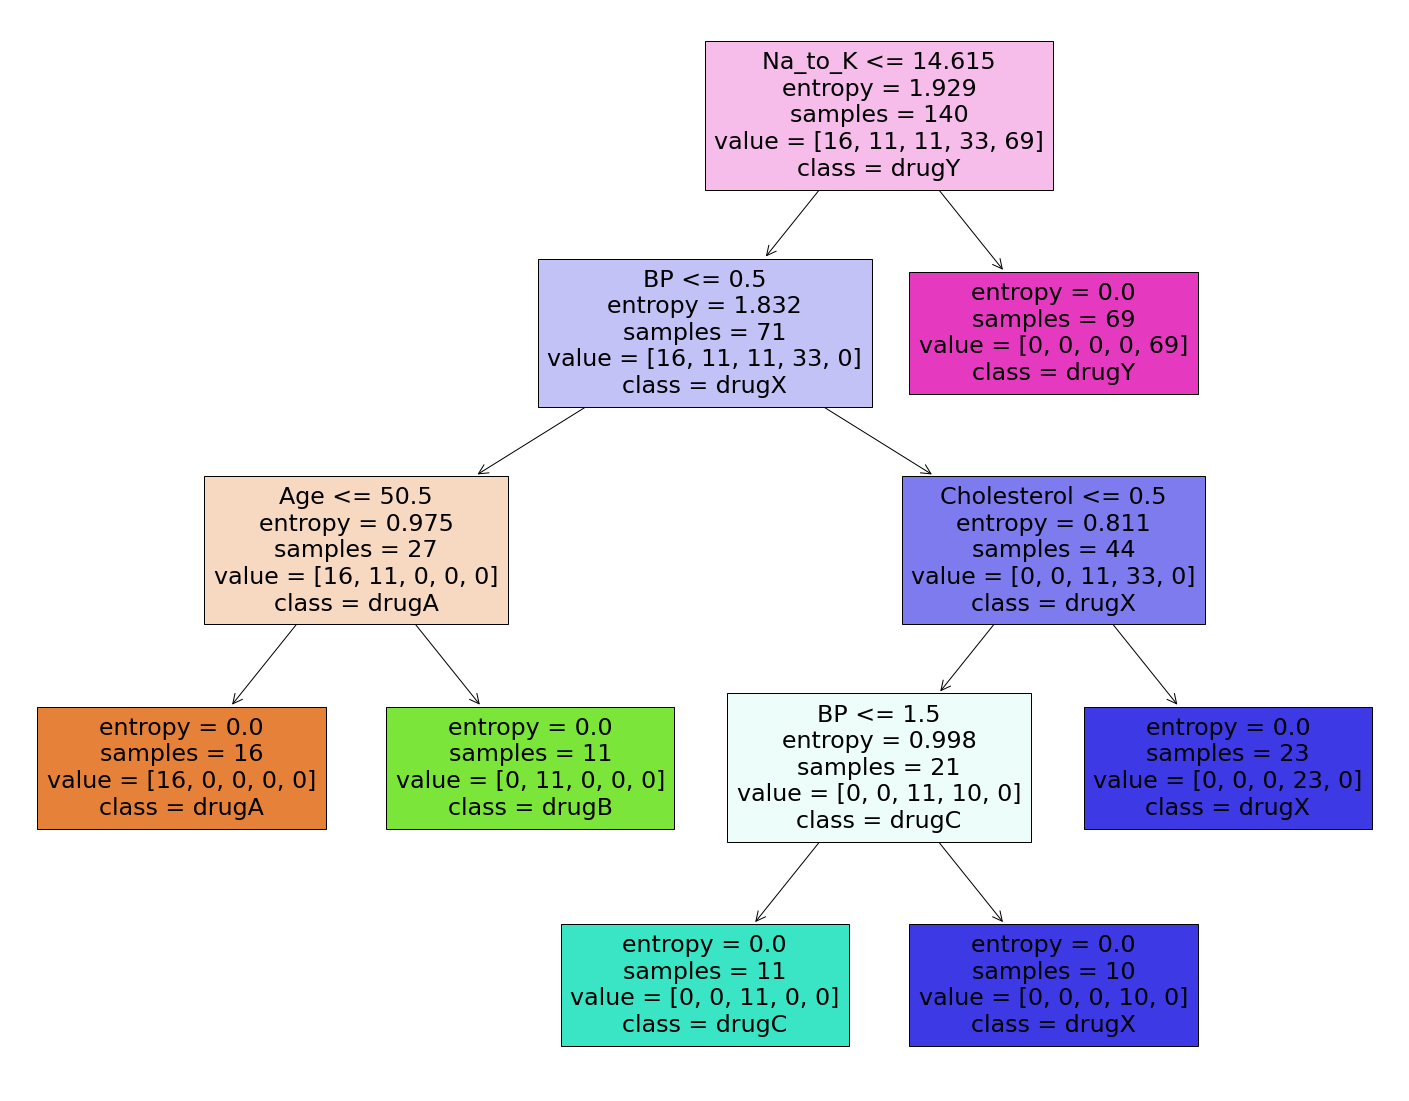

In [17]:
featureNames = my_data.columns[0:5]
fig = plt.figure(figsize=(25,20))
plot_tree(drugTree, 
                   feature_names=featureNames,  
                   class_names=np.unique(y_trainset),
                   filled=True)



Saving to a png figure

In [18]:
fig.savefig("decistion_tree.png")